<a href="https://colab.research.google.com/github/axipher/palette-reducer.ipynb/blob/main/Copy_of_palette_reducer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎨 Image Palette Reducer 🎨
_with the power of ✨MACHINE LEARNING✨_

Reduce an image to an exact number of colors. Results are often far superior to posterize or other quick methods. This can be used for pixel art, prep for vectorization, cleaning up video screenshots (works especially well on anime/cartoons), optimizing for low-color screens or filesize reduction.

by [0xabad1dea](https://https://twitter.com/0xabad1dea)

This is a good algorithm, **not** a fast one. Taking a minute or two to process is normal. A large (4k resolution) photograph could easily take half an hour. If you are going to shrink your image, do it _before_ using this utility.

## Instructions
- Click the folder icon 📂 on the left and upload a png or jpg
- Fill out the configuration block below with filename and desired color count
- Runtime -> Run All
- The output will be saved as palette-result.png in the file pane. You may need to click the file pane's refresh button to see it.
- It's done when the second image thumbnail appears at the bottom of this pane.

[example output for illustration](https://twitter.com/0xabad1dea/status/1345790894470012928) - [example output for photograph](https://twitter.com/0xabad1dea/status/1345855399820488707)

In [ ]:
### BEGIN CONFIGURATION ###

# put the EXACT filename you uploaded between the quotes
# alternatively, you can use a url (again, between quotes)
filename = "palette-result.png"

# the number of colors you want in the final image
targetColors = 16

# this seed keeps the algorithm deterministic
# you can change it to a different number if you want
seed = 0xabad1dea

### END CONFIGURATION ###

In [ ]:
# dependencies

%matplotlib inline
import matplotlib.pyplot as pyplot
from PIL import Image

import math
import numpy
import sklearn.cluster
import sklearn.preprocessing

Number of colors in original: 16


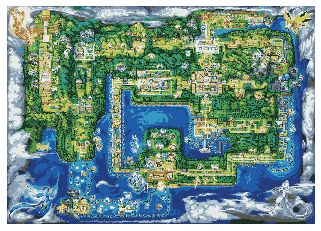

In [ ]:
# massage the file into a consistent colorspace
# (if one skips the convert("RGB"), some images
# will work fine and others not at all)
source = Image.open(filename)
source = source.convert("RGB")
source = numpy.asarray(source)

# throw out the alpha channel if present
# (will screw up the palette reduction otherwise)
source = source[:,:,:3]

sourcecolors = numpy.unique(source.reshape(-1, source.shape[2]), axis=0)
# print(sourcecolors)
print(f"Number of colors in original: {len(sourcecolors)}")

# pitch a fit if the image is already below target color count
assert(len(sourcecolors) >= targetColors)

pyplot.axis("off")
pyplot.imshow(source, interpolation="none")

Result palette:
[[ 40. 102.  60.]
 [176. 196. 208.]
 [ 33.  92. 166.]
 [202. 199.  88.]
 [137. 159. 179.]
 [230. 234. 230.]
 [ 52. 151. 110.]
 [ 26.  49.  35.]
 [139. 180.  82.]
 [104. 120. 141.]
 [ 53. 153. 198.]
 [ 36.  61. 127.]
 [214. 201. 150.]
 [ 88. 146.  69.]
 [179. 125.  74.]
 [ 85.  87.  76.]]


➡️THIS IS A PREVIEW THUMBNAIL.⬅️
YOUR RESULT IS IN palette-result.png IN THE FILE BROWSER ON THE LEFT.
YOU MAY NEED TO CLICK THE REFRESH-FOLDER ICON TO SEE IT.


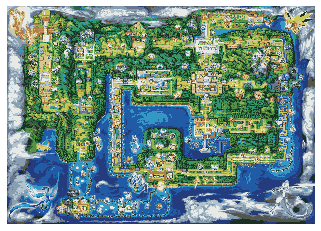

In [ ]:
# the actual magic 
# basically, what this does is create n pixel clusters that work like galaxies
# and at the end, every pixel takes the color at the heart of its own galaxy.
# this is better than "just take the n most common pixel values" because
# the cluster galaxies are ~evenly spaced through the colors used, while
# just taking the n most common can miss large ranges of the color space
sourceArray = source.reshape(-1, 3)
simplifier = sklearn.cluster.KMeans(n_clusters=targetColors, random_state=seed).fit(sourceArray)
simplifiedSource = simplifier.cluster_centers_[simplifier.labels_]
simplifiedSource = simplifiedSource.reshape(source.shape)

print("Result palette:")
print(simplifier.cluster_centers_)


print("\n\n➡️THIS IS A PREVIEW THUMBNAIL.⬅️\nYOUR RESULT IS IN palette-result.png IN THE FILE BROWSER ON THE LEFT.")
print("YOU MAY NEED TO CLICK THE REFRESH-FOLDER ICON TO SEE IT.")

pyplot.axis("off")
pyplot.imshow(simplifiedSource.astype(numpy.uint8), interpolation="none")

pyplot.imsave(fname='palette-result.png', arr=simplifiedSource.astype(numpy.uint8), format='png')